<a href="https://colab.research.google.com/github/cyberpavan123/fooddataexploration/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
The dataset contains 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB




```
# This is formatted as code
```

#### Observations:
	•	Numerical columns: cost_of_the_order, food_preparation_time, delivery_time
	•	Categorical columns: restaurant_name, cuisine_type, day_of_the_week, rating
	•	IDs (order_id, customer_id) are integers but categorical in meaning


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
No formal missing values(NaN)
"Not given" exists and represents unrated orders(handled as a category)


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Write your code here
df['food_preparation_time'].describe()[['min','mean','max']]

,food_preparation_time
min,20.00000
mean,27.37197
max,35.00000


#### Observations:
food_preparation_time
min	20 mins
average	27.37 mins
max	35 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here
(df['rating']=='Not given').sum()

np.int64(736)

#### Observations:
736 customers did not provide any ratings

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

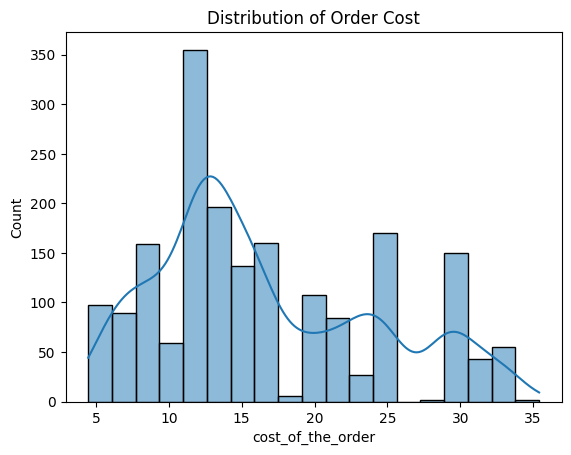

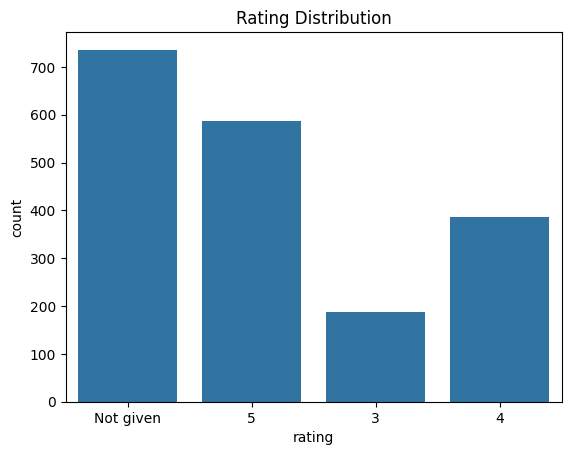

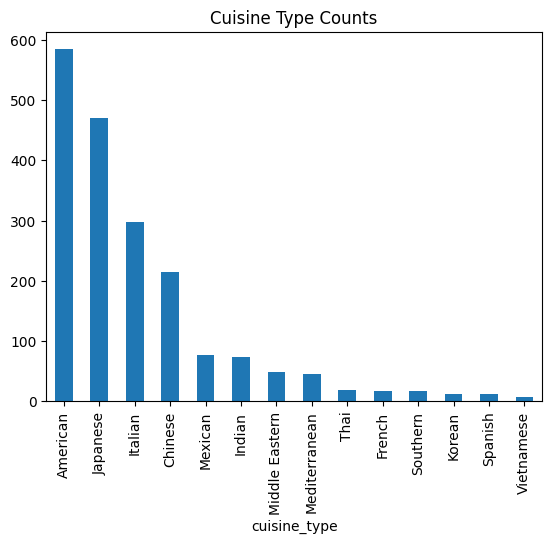

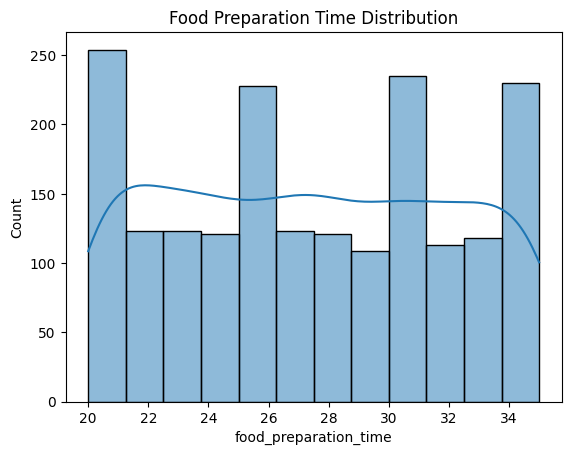

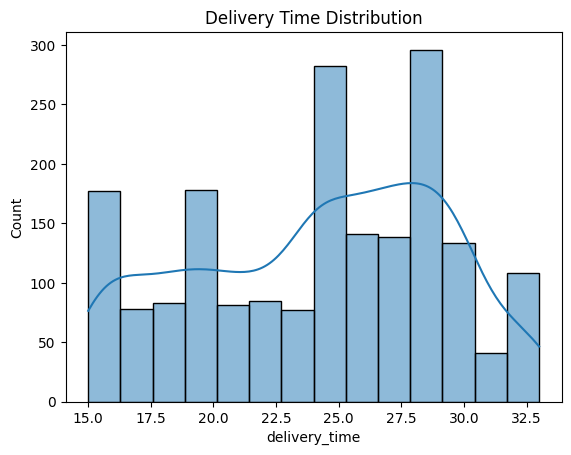

In [9]:
# Write the code here
# Cost distribution
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Order Cost')
plt.show()

# Rating distribution
sns.countplot(x='rating', data=df)
plt.title('Rating Distribution')
plt.show()

# Cuisine
df['cuisine_type'].value_counts().plot(kind='bar')
plt.title('Cuisine Type Counts')
plt.show()

# Preparation time
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Food Preparation Time Distribution')
plt.show()

# Delivery time
sns.histplot(df['delivery_time'], kde=True)
plt.title('Delivery Time Distribution')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [10]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The most frequently ordered restraunts are Shake Shack, The Meatball Shop and Blue Ribbon Sushi.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [11]:
# Write the code here
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().idxmax()

'American'

#### Observations:
American cuisine is the most popular one over the weekend.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [12]:
# Write the code here
percentage = (df['cost_of_the_order'] > 20).mean() * 100
percentage

np.float64(29.24130663856691)



```
# This is formatted as code
```

#### Observations:
Around 29% of the orders cost more than 20$.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [13]:
# Write the code here
df['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:
Average delivery time is 24 mins.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [14]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Customer id with 52832 , 47440 and 83287 are the customers who placed most of the orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


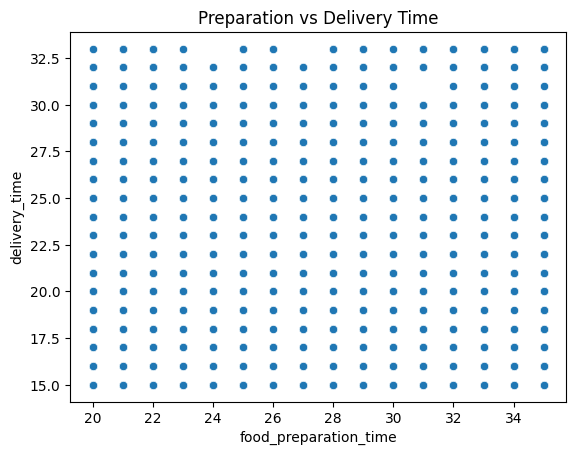

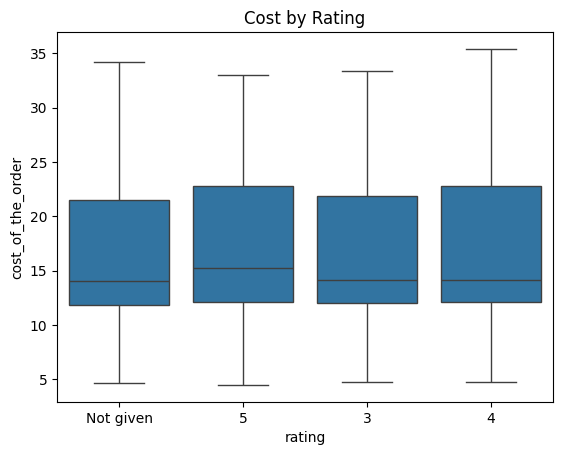

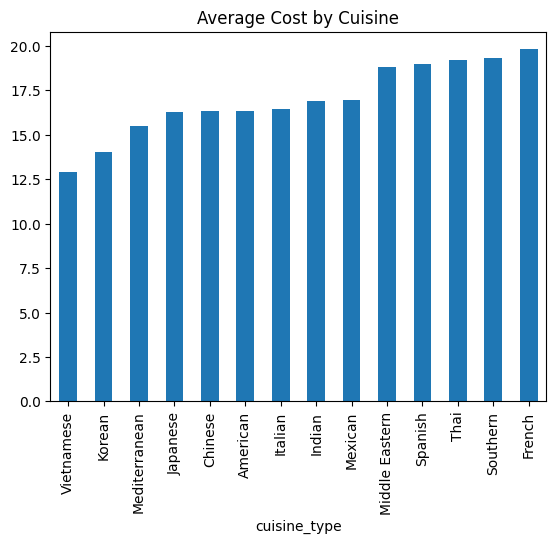

In [15]:
# Write the code here
# Scatter: prep vs delivery
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df)
plt.title("Preparation vs Delivery Time")
plt.show()

# Cost vs rating
sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.title("Cost by Rating")
plt.show()

# Average cost per cuisine
df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values().plot(kind='bar')
plt.title("Average Cost by Cuisine")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [16]:
# Write the code here
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')

promo = df.groupby('restaurant_name').agg(
    rating_count = ('rating_numeric','count'),
    avg_rating = ('rating_numeric','mean')
)

promo[(promo['rating_count'] > 50) & (promo['avg_rating'] > 4)]

,rating_count,avg_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
Blue Ribbon Fried Chicken	64	4.328125
Blue Ribbon Sushi	73	4.219178
Shake Shack	133	4.278195
The Meatball Shop	84	4.511905
These are the restraunts meeting the critieria.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [17]:
# Write the code here
df['revenue'] = np.where(df['cost_of_the_order'] > 20,
                         0.25 * df['cost_of_the_order'],
                         np.where(df['cost_of_the_order'] > 5,
                                  0.15 * df['cost_of_the_order'],
                                  0))
df['revenue'].sum()

np.float64(6166.303)

#### Observations:
Typcial revenue is around 6100$.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [18]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
(df['total_time'] > 60).mean() * 100

np.float64(10.537407797681771)

#### Observations:
Around 10% of the orders are taking more than 60 mins.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [19]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
	•	Weekend delivery times are slightly higher due to traffic/demand.
	•	Weekday deliveries are faster on average.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  A few restaurants dominate order volume; optimizing these can significantly improve platform performance.
*	Delivery time is reasonable overall but longer on weekends.
*	Many customers do not provide ratings (“Not given”) → feedback participation is weak.
*	Cuisines like American, Japanese, and Mexican drive the highest demand.
*	Prep time has a modest positive effect on delivery time.

### Recommendations:

1.	Optimize High-Demand Restaurants
Work with top restaurants to reduce prep times and improve order flow.
2.	Weekend Delivery Reinforcement
Increase delivery partner staffing on weekends.
3.	Encourage Ratings
Offer coupons for customers who submit ratings.
4.	Targeted Cuisine Promotions
Promote top cuisines on weekends and provide bundled deals.
5.	Reduce Long-Prep Restaurants’ Bottlenecks
Provide operational feedback to restaurants with high prep times.
6.	Upsell High-Value Customers
Use loyalty programs for top customers to encourage repeat purchases.